In [504]:
#importing pandas
import pandas as pd

In [505]:
#importing regular expressions 
import re

In [506]:
#importing data visualization matplot and seabaron libraries 
import seaborn as sns
import matplotlib.pyplot as plt

In [507]:
#creating inital llj dataframe
dfllj = pd.read_csv('/Users/matt/Desktop/LLJ-Data/llj.csv')

In [508]:
#creating inital spec dataframe
dfspec = pd.read_csv('/Users/matt/Desktop/LLJ-Data/spectrum.csv')

In [509]:
#getting information about llj dataframe
dfllj.describe(include = 'all')

,Title,Author,Citation,Issue,Type,Description
count,3089,2532,4972,4543,4972,3218
unique,2779,1628,4938,11,12,699
top,Keeping up with New Legal Titles,"Whisner, Mary",102 Law Libr. J. [i] (2010),Issue 1,article,Comments
freq,51,65,4,1177,1715,174


In [510]:
#determining number of observation missing author field llj
AuthorBlankLLJ = dfllj['Author'].isna().sum()
print(f"Number of rows missing the '{'Author'}' field in '{'dfllj'}' {AuthorBlankLLJ}")

Number of rows missing the 'Author' field in 'dfllj' 2440


In [511]:
#determining number of observations missing title field llj
TitleBlankLLJ = dfllj['Title'].isna().sum()
print(f"Number of rows missing the '{'Title'}' field in '{'dfllj'}': {TitleBlankLLJ}")

Number of rows missing the 'Title' field in 'dfllj': 1883


In [512]:
#determing number of observations missing author and title field llj
AuthorTitleBlankLLJ = dfllj[dfllj['Author'].isna() & dfllj['Title'].isna()].shape[0]
print(f"Number of rows missing the '{'Author'}' field and '{'Title'}' field in '{'dfllj'}': {AuthorTitleBlankLLJ} ")

Number of rows missing the 'Author' field and 'Title' field in 'dfllj': 1876 


In [513]:
#getting information about spec dataframe
dfspec.describe(include='all')

,Title,Author,Citation,Issue,Type,Description
count,2340,2068,2790,2764,2790,2154
unique,2257,1281,1060,11,8,214
top,Washington Brief,"Healey, Paul D.",13 AALL Spectrum 1 (2008-2009),Issue 1,article,Feature
freq,14,52,18,418,1096,400


In [514]:
#determining number of observations missing author field spec
AuthorBlankSpec = dfspec['Author'].isna().sum()
print(f"Number of rows missing the '{'Author'}' field in '{'dfspec'}': {AuthorBlankSpec}")

Number of rows missing the 'Author' field in 'dfspec': 722


In [515]:
#determining number of observations missing title field spec
TitleBlankSpec = dfspec['Title'].isna().sum()
print(f"Number of rows missing the '{'Title'}' field in '{'dfspec'}': {TitleBlankSpec}")

Number of rows missing the 'Title' field in 'dfspec': 450


In [516]:
#determining number of observations missing author and title field spec 
AuthorTitleBlankSpec = dfspec[dfspec['Author'].isna() & dfspec['Title'].isna()].shape[0]
print(f"Number of rows missing the '{'Author'}' field and '{'Title'}' field in '{'dfllj'}': {AuthorTitleBlankSpec} ")

Number of rows missing the 'Author' field and 'Title' field in 'dfllj': 420 


In [517]:
#total observations across both data frames missing author and title fields 
TotalMissing = AuthorTitleBlankLLJ + AuthorTitleBlankSpec
print(f"Number of rows across both dataframes missing '{'Author'}' and '{'Title'}' fields: {TotalMissing}")

Number of rows across both dataframes missing 'Author' and 'Title' fields: 2296


In [518]:
#conducting random sampling of data frames to determine if any useful data entries would be lost if some were excluded due to blank fields
rsmissingAT_dfllj = dfllj[dfllj['Title'].isna() & dfllj ['Author'].isna()].sample(n=188)
print(rsmissingAT_dfllj)

     Title Author                     Citation    Issue      Type   \
2610   NaN    NaN    61 Law Libr. J. 41 (1968)  Issue 1   comments   
2077   NaN    NaN   50 Law Libr. J. 568 (1957)  Issue 5   comments   
2668   NaN    NaN     62 Law Libr. J. v (1969)      NaN      index   
2992   NaN    NaN   67 Law Libr. J. 402 (1974)  Issue 3   comments   
2375   NaN    NaN   56 Law Libr. J. 165 (1963)  Issue 2    reviews   
...    ...    ...                          ...      ...        ...   
3639   NaN    NaN  78 Law. Libr. J. [i] (1986)      NaN  titlepage   
2195   NaN    NaN    53 Law Libr. J. 50 (1960)  Issue 1      notes   
1659   NaN    NaN   41 Law Libr. J. 397 (1948)  Issue 4      index   
1805   NaN    NaN   46 Law Libr. Jr. 37 (1953)  Issue 1   comments   
1735   NaN    NaN    44 Law Libr. J. 38 (1951)  Issue 1    reviews   

                                            Description  
2610                                          Memorials  
2077                              Questions

In [519]:
rsmissingAT_dfllj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 2610 to 1735
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        0 non-null      object
 1   Author       0 non-null      object
 2   Citation     188 non-null    object
 3   Issue        147 non-null    object
 4   Type         188 non-null    object
 5   Description  188 non-null    object
dtypes: object(6)
memory usage: 10.3+ KB


In [520]:
rsmissingAT_type_counts_dfllj = rsmissingAT_dfllj['Type '].value_counts()
print(rsmissingAT_type_counts_dfllj)

Type 
comments     43
index        37
contents     30
misc         22
notes        22
titlepage    18
reviews      16
Name: count, dtype: int64


In [521]:
rsmissingAT_dfspec = dfspec[dfspec['Title'].isna() & dfllj ['Author'].isna()].sample(n=42)
print(rsmissingAT_dfspec)

     Title            Author                               Citation    Issue  \
2151   NaN               NaN     21 AALL Spectrum 9 (May/June 2017)  Issue 5   
1015   NaN               NaN        12 AALL Spectrum 29 (2007-2008)  Issue 5   
877    NaN               NaN         11 AALL Spectrum 1 (2006-2007)  Issue 2   
1653   NaN               NaN         17 AALL Spectrum 2 (2012-2013)  Issue 6   
1599   NaN               NaN         17 AALL Spectrum 2 (2012-2013)  Issue 2   
989    NaN               NaN         12 AALL Spectrum 2 (2007-2008)  Issue 4   
1117   NaN               NaN         13 AALL Spectrum 1 (2008-2009)  Issue 2   
53     NaN               NaN          1 AALL Spectrum 1 (1996-1997)  Issue 6   
108    NaN               NaN          2 AALL Spectrum 2 (1997-1998)  Issue 1   
562    NaN               NaN          7 AALL Spectrum 1 (2002-2003)  Issue 3   
1659   NaN               NaN         17 AALL Spectrum 1 (2012-2013)  Issue 6   
2652   NaN               NaN        26 A

/var/folders/51/1bmpv68x1h3gvxqw6fktjqh80000gn/T/ipykernel_69897/1489894842.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rsmissingAT_dfspec = dfspec[dfspec['Title'].isna() & dfllj ['Author'].isna()].sample(n=42)


In [522]:
rsmissingAT_dfspec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 2151 to 1842
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        0 non-null      object
 1   Author       3 non-null      object
 2   Citation     42 non-null     object
 3   Issue        40 non-null     object
 4   Type         42 non-null     object
 5   Description  42 non-null     object
dtypes: object(6)
memory usage: 2.3+ KB


In [523]:
rsmissingAT_type_counts_dfspec = rsmissingAT_dfspec['Type '].value_counts()
# ? what is the right variable name
print(rsmissingAT_type_counts_dfspec)

Type 
notes        18
contents     16
comments      3
titlepage     2
misc          2
article       1
Name: count, dtype: int64


In [524]:
#trying to create new dataframe where all rows that were missing Author field in lljcsv are dropped
dflljauthor = dfllj.dropna(subset=['Author'])
dflljauthor.loc[:, 'Author'] = dflljauthor['Author'].str.split(';')
dflljauthor = dflljauthor.explode('Author')
dflljauthor.reset_index(drop=True, inplace=True)
dflljauthor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2948 non-null   object
 1   Author       2958 non-null   object
 2   Citation     2958 non-null   object
 3   Issue        2945 non-null   object
 4   Type         2958 non-null   object
 5   Description  1109 non-null   object
dtypes: object(6)
memory usage: 138.8+ KB


In [525]:
#trying to create new dataframe where all rows that were missing Author field in speccsv are dropped 
dfspecauthor = dfspec.dropna(subset=['Author'])
dfspecauthor.loc[:, 'Author'] = dfspecauthor['Author'].str.split(';')
dfspecauthor = dfspecauthor.explode('Author')
dfspecauthor.reset_index(drop=True, inplace=True)
dfspecauthor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2508 non-null   object
 1   Author       2538 non-null   object
 2   Citation     2538 non-null   object
 3   Issue        2538 non-null   object
 4   Type         2538 non-null   object
 5   Description  1676 non-null   object
dtypes: object(6)
memory usage: 119.1+ KB


In [526]:
dflljauthor.head(50)

,Title,Author,Citation,Issue,Type,Description
0,Address at a Joint Session with the American L...,"Gilbert, Frank B.",1 Index to Legal Periodicals and Law Libr. J. ...,Issue 1,comments,The Law Library
1,Classification of Law Textbooks,"Berry, W. J. C.",1 Index to Legal Periodicals and Law Libr. J. ...,Issue 1,notes,NaN
2,Legislative Reference Work and the Law Library,"Lester, C. B.",1 Index to Legal Periodicals and Law Libr. J. ...,Issue 3,notes,NaN
3,Cataloguing Law Books with Special Reference t...,"Glasier, Gilson G.",1 Index to Legal Periodicals and Law Libr. J. ...,Issue 3,notes,NaN
4,The Bibliography of Canadian Statute Law,"Eakins, W. George",1 Index to Legal Periodicals and Law Libr. J. ...,Issue 3,notes,NaN
5,"Coke's Reports, and the Anonymous Commentary o...","Seymour, Charles B.",10 Law Libr. J. 1 (1917-1918),Issue 1,article,NaN
6,Some By-Products from Worcester County Law Lib...,"Wire, G. E.",10 Law Libr. J. 3 (1917-1918),Issue 1,article,NaN
7,Recent Developments in International and Munic...,"Borchard, Edwin M.",10 Law Libr. J. 21 (1917-1918),Issue 2,article,NaN
8,The Need for College Instruction in the Use of...,"Foote, Mary S.",10 Law Libr. J. 25 (1917-1918),Issue 2,article,NaN
9,Law and Legislative Reference as Parts of a St...,"Cobb, Maud B.",10 Law Libr. J. 51 (1917-1918),Issue 3,article,NaN


In [527]:
dfspecauthor.head(50)

,Title,Author,Citation,Issue,Type,Description
0,NaN,"Houdek, Frank G.",1 AALL Spectrum 4 (1996-1997),Issue 1,comments,Presidential Proclamation
1,"End of West(ern) Civilization, The","Stephens, Joe K.",1 AALL Spectrum 6 (1996-1997),Issue 1,notes,Spectrumail
2,Washington Brief,"Baish, Mary Alice",1 AALL Spectrum 8 (1996-1997),Issue 1,comments,Comment
3,Fear and Loathing at the Reference Desk: A New...,"Healey, Paul D.",1 AALL Spectrum 10 (1996-1997),Issue 1,article,Feature
4,Law Librarianship: Rebirth or Buried Alive,"McNeill, John",1 AALL Spectrum 12 (1996-1997),Issue 1,article,Feature
5,In Their Faces: Strategic Positioning for Law ...,"Koslov, Marcia",1 AALL Spectrum 27 (1996-1997),Issue 1,article,Delivering the Message: Indianapolis
6,Men at Work/Minds at Risk: The All-Male Refere...,"Brown, Ladd",1 AALL Spectrum 40 (1996-1997),Issue 1,article,Feature
7,Washington Brief,"Baish, Mary Alice",1 AALL Spectrum 4 (1996-1997),Issue 2,notes,Notes
8,"Once and Future World of US Legal Publishing, ...","Heroy, Donna Tuke",1 AALL Spectrum 6 (1996-1997),Issue 2,article,Feature
9,Technology and the Courts: An Interview with t...,"David, Shirley H.",1 AALL Spectrum 10 (1996-1997),Issue 2,comments,Feature


In [528]:
def extract_years_multiple(Citation):
    matches = re.findall(r'\b(\d{4})\b', Citation)
    if matches:
        return matches[0]
    else:
        return None

In [529]:
dflljauthor['Date'] = dflljauthor['Citation'].apply(extract_years_multiple)
dflljauthor = dflljauthor.drop(columns=['Citation']) 
print(dflljauthor)

                                                  Title               Author  \
0     Address at a Joint Session with the American L...    Gilbert, Frank B.   
1                       Classification of Law Textbooks      Berry, W. J. C.   
2        Legislative Reference Work and the Law Library        Lester, C. B.   
3     Cataloguing Law Books with Special Reference t...   Glasier, Gilson G.   
4              The Bibliography of Canadian Statute Law    Eakins, W. George   
...                                                 ...                  ...   
2953  Managing by the Book... Perfecting Negotiating...    Holcomb, Jean M.    
2954  Technology for Everyone... Tools for Creating ...       Murley, Diane    
2955                Memorial: Viola A. Bird (1905-2007)  Hazelton, Penny A.    
2956              Memorial: Maurice D. Leon (1911-2007)       Center, Sue L.   
2957                           From the Editor: Endnote     Houdek, Frank G.   

        Issue     Type       Descriptio

In [530]:
def extract_years_multiple(Citation):
    matches = re.findall(r'\b(\d{4})\b', Citation)
    if matches:
        return matches[0]
    else:
        return None

In [531]:
dfspecauthor['Date'] = dfspecauthor['Citation'].apply(extract_years_multiple)
dfspecauthor = dfspecauthor.drop(columns=['Citation'])
print(dfspecauthor)

                                                  Title               Author  \
0                                                   NaN    Houdek, Frank G.    
1                   End of West(ern) Civilization, The      Stephens, Joe K.   
2                                      Washington Brief   Baish, Mary Alice    
3     Fear and Loathing at the Reference Desk: A New...     Healey, Paul D.    
4            Law Librarianship: Rebirth or Buried Alive       McNeill, John    
...                                                 ...                  ...   
2533  Physical Security in a Transformed World: Now ...       Simek, John W.   
2534  Physical Security in a Transformed World: Now ...  Maschke, Michael C.   
2535         Breaking down Data to Get Helpful Insights        Metheny, Ryan   
2536         Breaking down Data to Get Helpful Insights   Trovillo, Michelle   
2537         Breaking down Data to Get Helpful Insights     Vanderlin, Scott   

        Issue     Type                 

In [532]:
dflljauthor['Author'].value_counts().head(10)

Author
Whisner, Mary         66
Keele, Benjamin J.    22
Houdek, Frank G.      21
Sexton, Nick          21
Danner, Richard A.    20
Wire, G. E.           16
Surrency, Erwin C.    16
Mersky, Roy M.        14
Scott, Bettie         14
Roalfe, William R.    13
Name: count, dtype: int64

In [533]:
dfspecauthor['Author'].value_counts().head(10)

Author
Healey, Paul D.         54
Catterall, Susan        34
Baish, Mary Alice       33
Feltren, Emily          31
Estes, Mark E.          28
Vanderlin, Scott        25
Estes, Mark             24
Lemmer, Catherine A.    24
Nash, Maribel           22
Lastres, Steven A.      21
Name: count, dtype: int64

In [534]:
lljauthorcounts = dflljauthor['Author'].value_counts().reset_index()
lljauthorcounts.columns = ['Author', 'Number of Publications']

In [535]:
lljauthorcounts.to_csv('lljauthorcounts.csv')

In [536]:
specauthorcounts = dfspecauthor['Author'].value_counts().reset_index()
specauthorcounts.columns = ['Author', 'Number of Publications']

In [537]:
specauthorcounts.to_csv('specauthorcounts.csv')

In [538]:
lljauthorcounts['Number of Publications'].value_counts().idxmax()

1

In [539]:
lljauthorcounts['Number of Publications'].value_counts().median()

6.0

In [540]:
lljauthorcounts['Number of Publications'].mean()

1.6534376746785915

In [541]:
lljauthorcounts['Number of Publications'].std()

2.3674162279508613

In [542]:
specauthorcounts['Number of Publications'].value_counts().idxmax()

1

In [543]:
specauthorcounts['Number of Publications'].value_counts().median()

2.0

In [544]:
specauthorcounts['Number of Publications'].mean()

1.8115631691648821

In [545]:
specauthorcounts['Number of Publications'].std()

2.9056905592621645

/opt/anaconda3/envs/LLJSpectrum/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


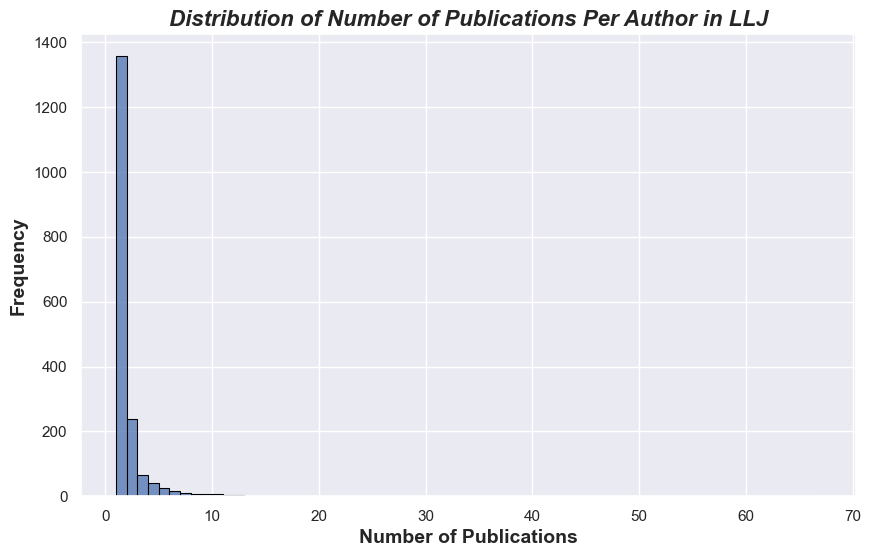

In [546]:
# Set Seaborn style
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.histplot(lljauthorcounts['Number of Publications'], bins=range(1, max(lljauthorcounts['Number of Publications']) + 2), kde=False, edgecolor='black')
plt.xlabel('Number of Publications', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.title('Distribution of Number of Publications Per Author in LLJ', fontsize = 16, fontweight = 'bold', style = 'italic')
plt.show()

/opt/anaconda3/envs/LLJSpectrum/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


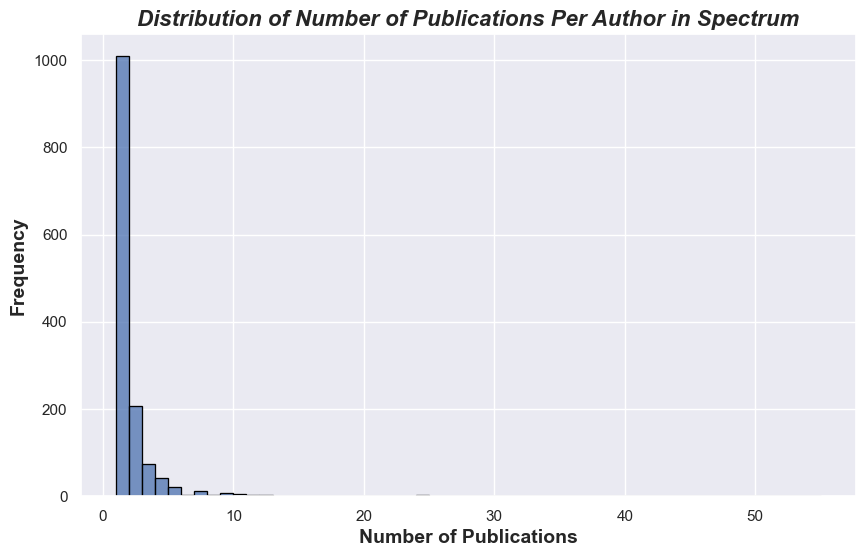

In [547]:
# Set Seaborn style
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.histplot(specauthorcounts['Number of Publications'], bins=range(1, max(specauthorcounts['Number of Publications']) + 2), kde=False, edgecolor='black')
plt.xlabel('Number of Publications', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.title('Distribution of Number of Publications Per Author in Spectrum', fontsize = 16, fontweight = 'bold', style = 'italic')
plt.show()

In [548]:
dflljyear = dfllj.dropna(subset=['Author'])
dflljyear.reset_index(drop=True, inplace=True)

In [554]:
dflljyear.loc[:, 'Year'] = dflljyear.loc[:, 'Citation'].apply(lambda x: extract_years_multiple(x))

In [566]:
year_counts_llj = dflljyear['Year'].value_counts().sort_index()

In [556]:
dfspecyear = dfspec.dropna(subset=['Author'])
dfspec.reset_index(drop=True, inplace=True)

In [558]:
dfspecyear.loc[:, 'Year'] = dfspecyear.loc[:, 'Citation'].apply(lambda x: extract_years_multiple(x))

In [568]:
year_counts_spec = dfspecyear['Year'].value_counts().sort_index()

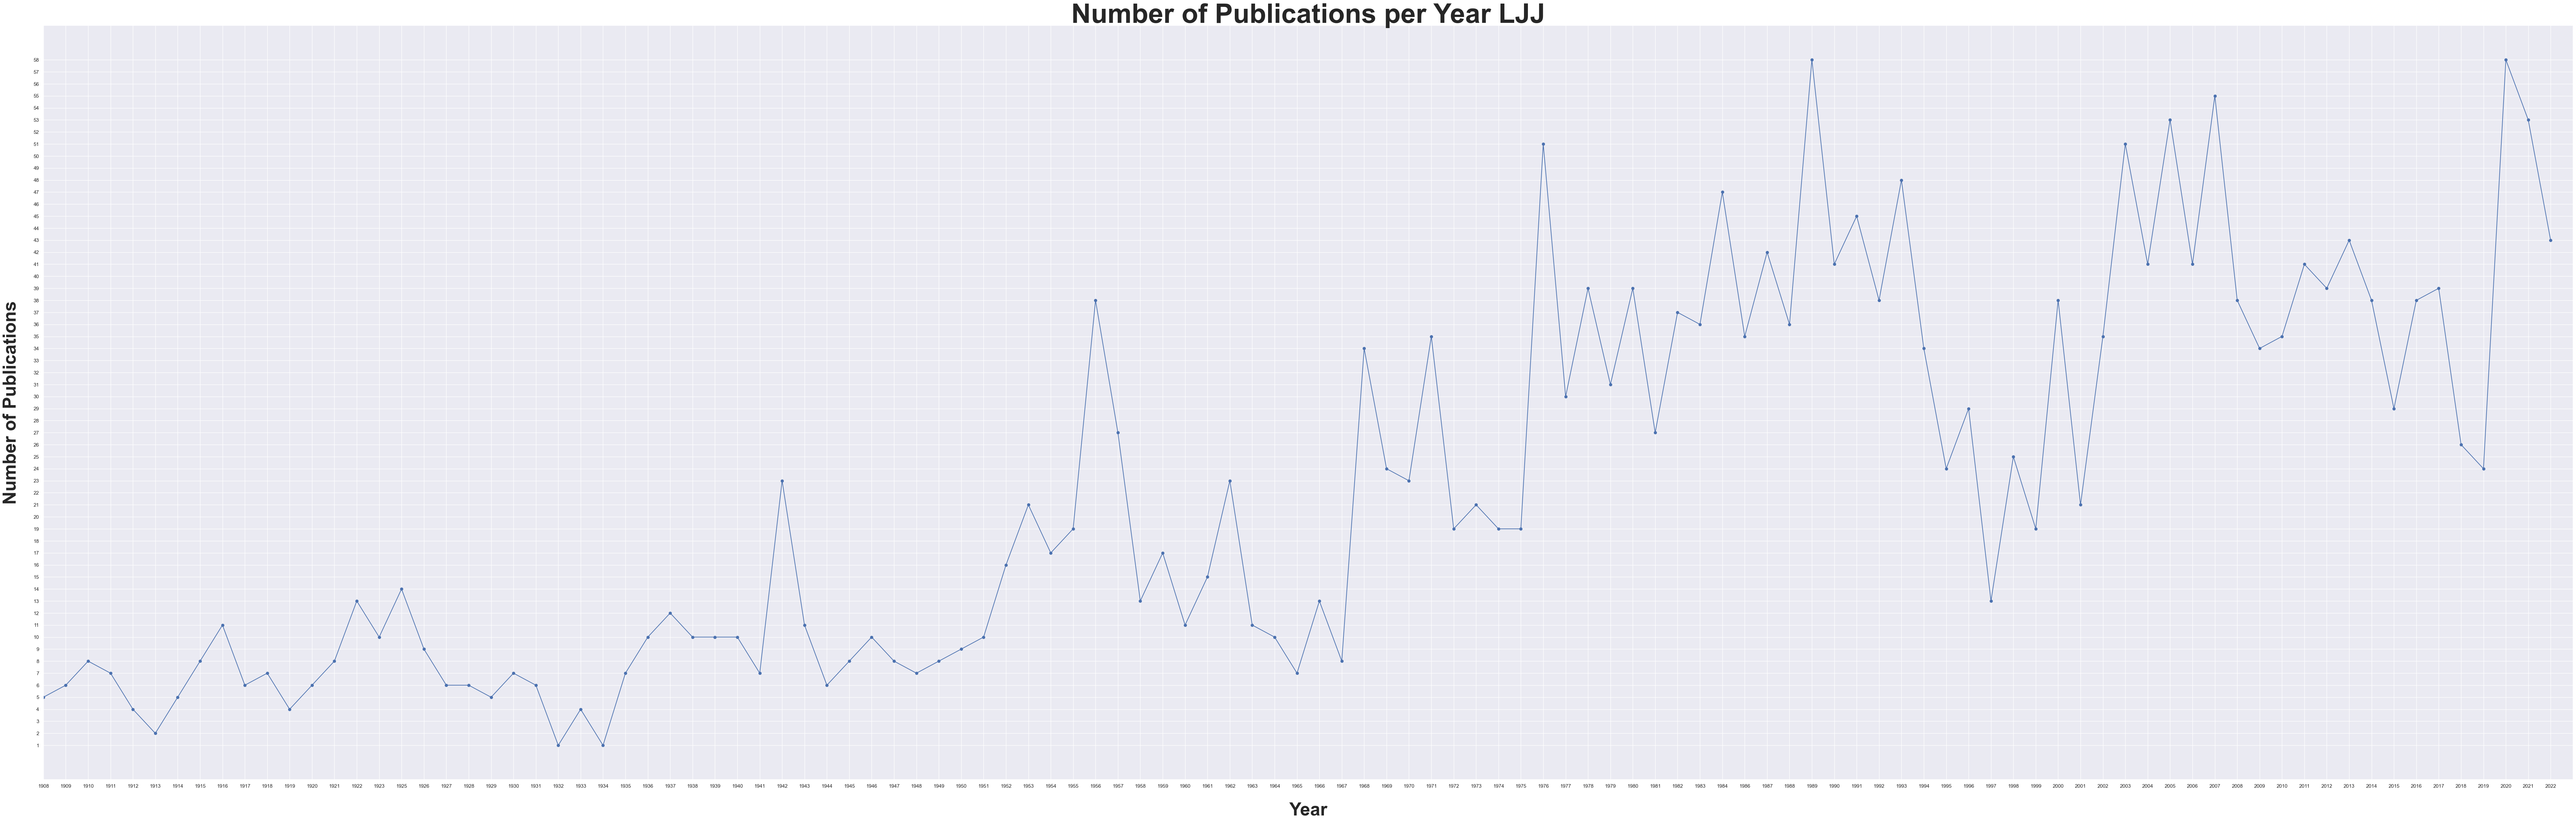

In [574]:
plt.figure(figsize=(100, 30))
plt.plot(year_counts_llj.index, year_counts_llj.values, marker='o', linestyle='-')
plt.xlim(left = 0, right = 113)
plt.yticks(range(min(year_counts_llj.values), max(year_counts_llj.values)+1, 1))
plt.title('Number of Publications per Year LJJ', fontsize=60, fontweight = 'bold')
plt.xlabel('Year', fontsize=40, fontweight = 'bold', labelpad=30)
plt.ylabel('Number of Publications', fontweight = 'bold', fontsize=40, labelpad=30)

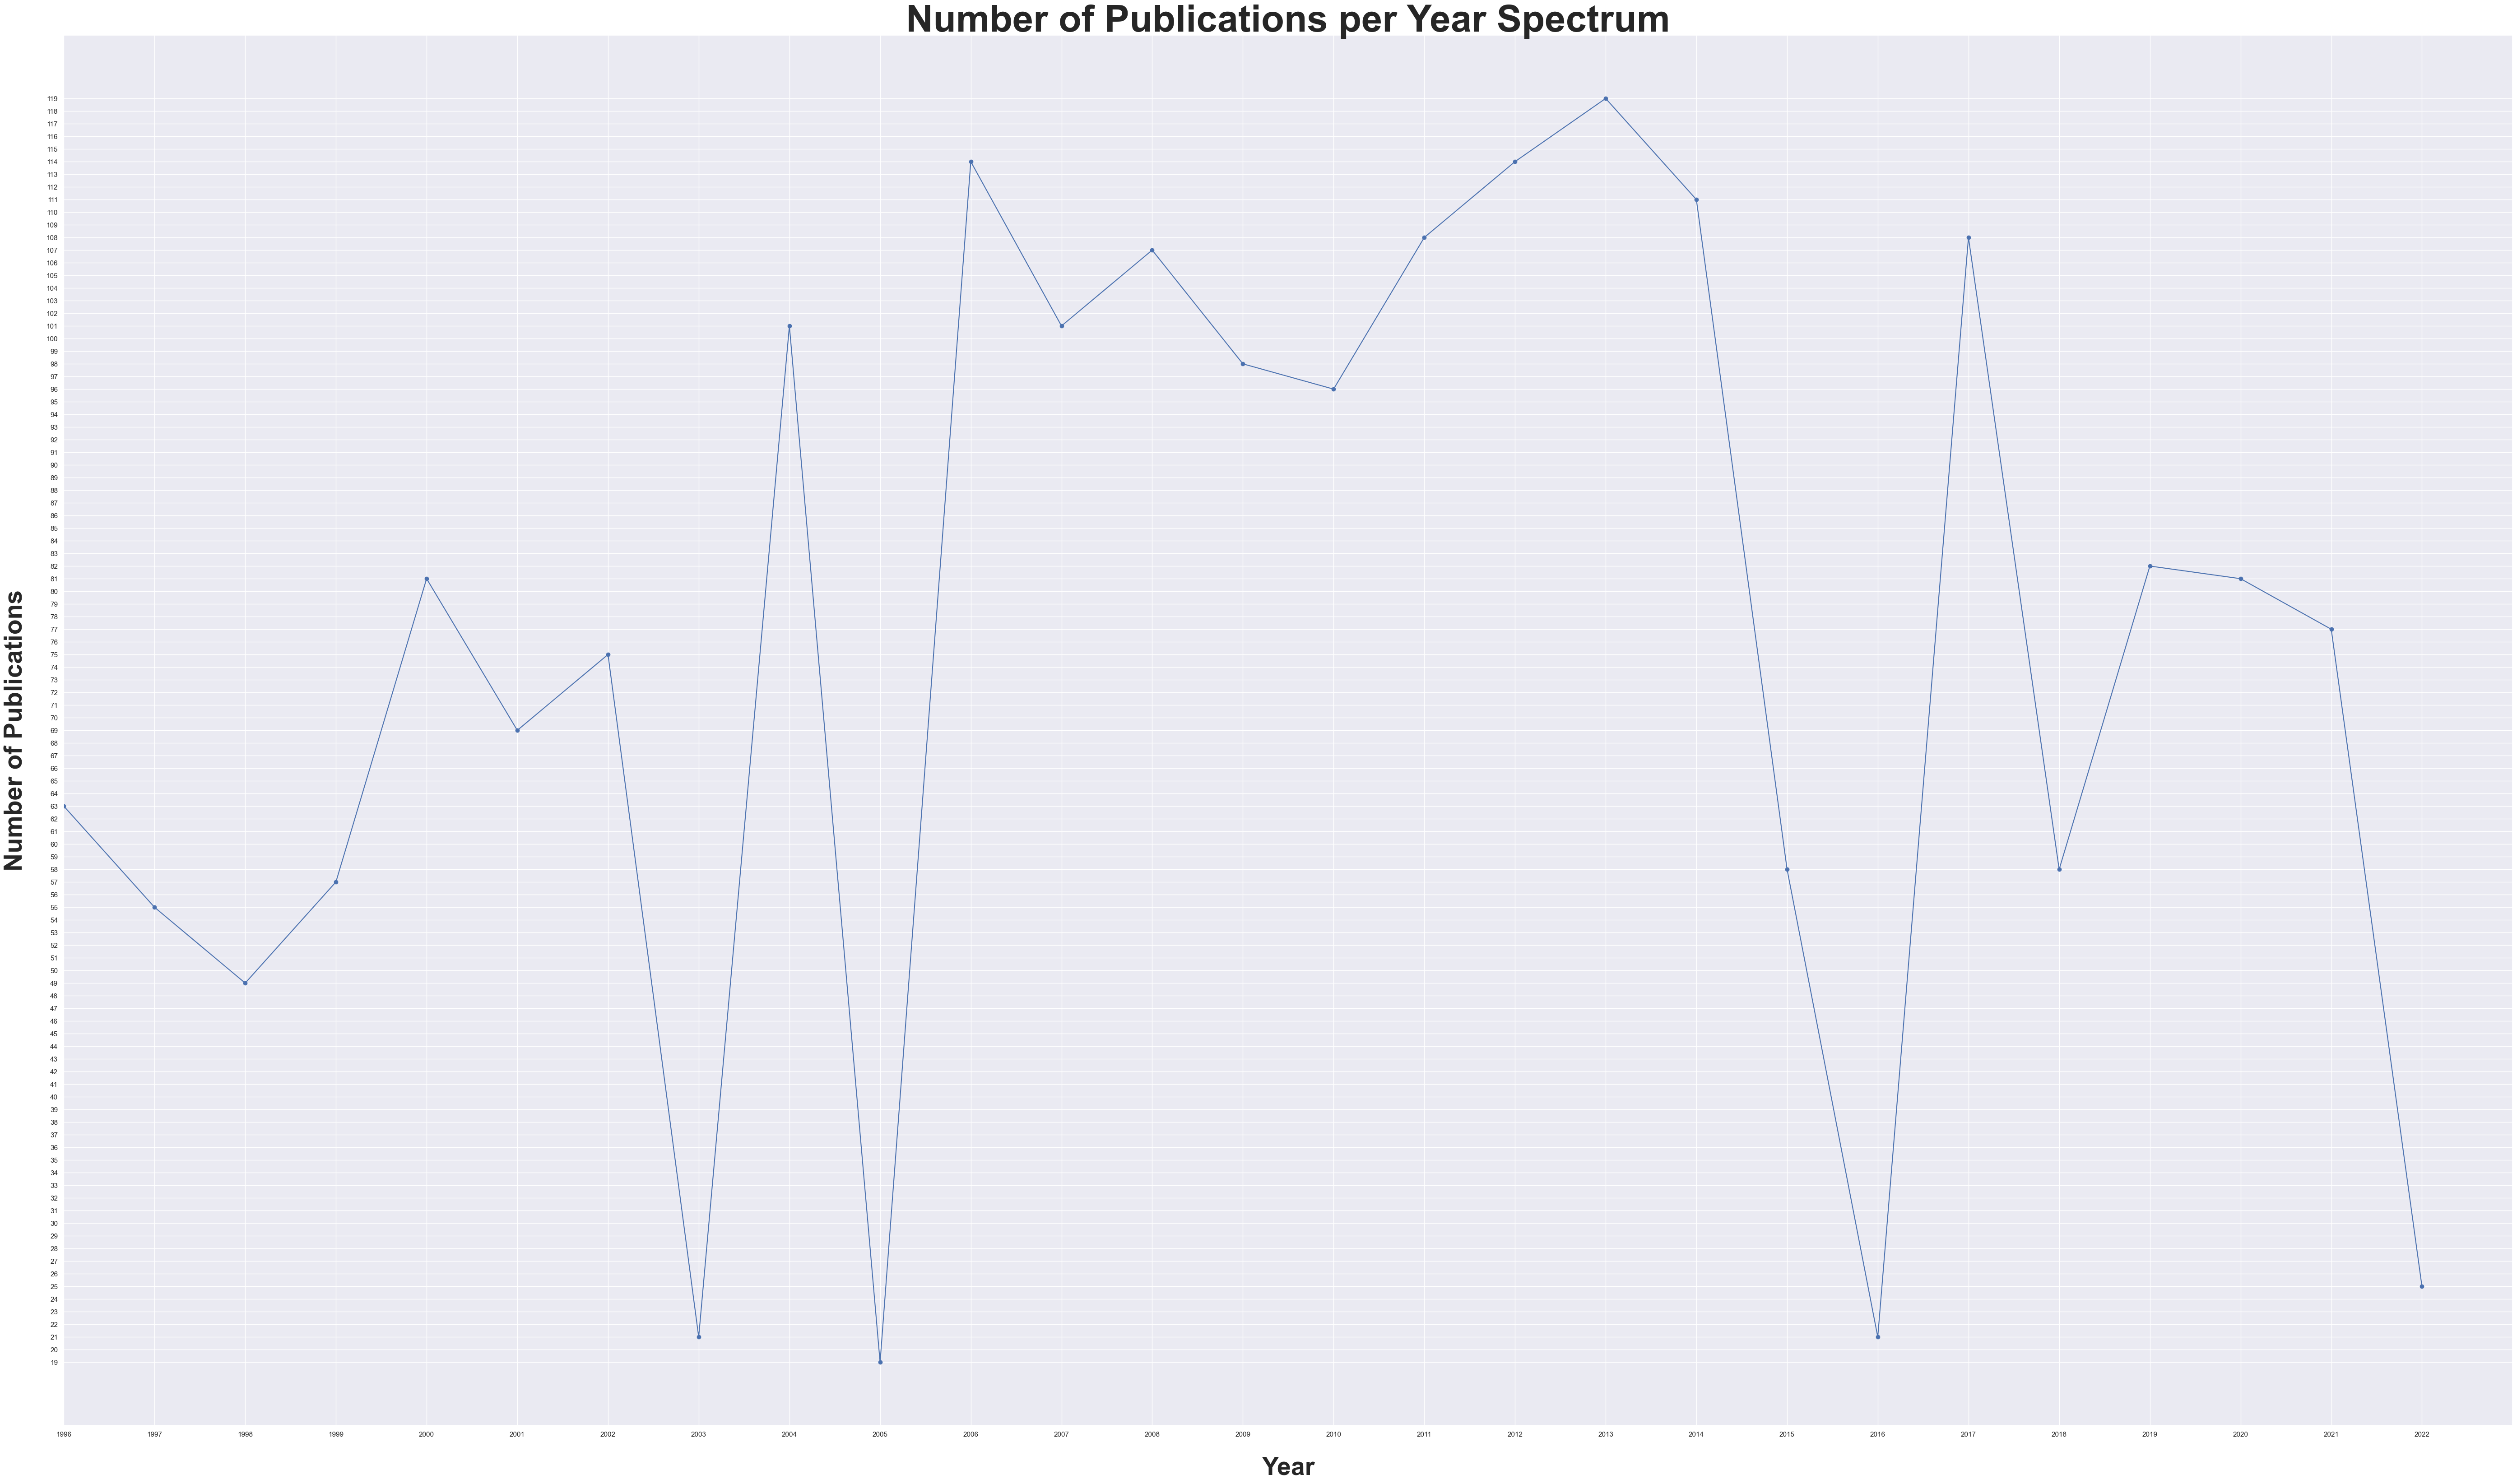

In [579]:
plt.figure(figsize=(70, 40))
plt.plot(year_counts_spec.index, year_counts_spec.values, marker='o', linestyle='-')
plt.xlim(left = 0, right = 27)
plt.yticks(range(min(year_counts_spec.values), max(year_counts_spec.values)+1, 1))
plt.title('Number of Publications per Year Spectrum', fontsize=60, fontweight = 'bold')
plt.xlabel('Year', fontsize=40, fontweight = 'bold', labelpad=30)
plt.ylabel('Number of Publications', fontweight = 'bold', fontsize=40, labelpad=30)